<a href="https://colab.research.google.com/github/az09tuan/PLK1/blob/main/updated-20241014-Nhung-Final_FDA_LazyRegression_Model_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Import libraries**

In [3]:
! pip install lazypredict

In [2]:
import pandas as pd

In [4]:
df=pd.read_csv('KCNN4-machine learning - inactive and active-delete 1 Senica.csv')

In [5]:
df

,acvalue,unit,SMILE,SOURCE,bioactivity_class,pIC50
0,33.0000,uM,COCCN(C1=CN=CC=C1)P(=O)(C2=CC=CC=C2)C3=CC=CC=C3,Pubchem,Inactive,4.481486
1,33.0000,uM,C1=CC=C(C=C1)P(=O)(C2=CC=CC=C2)N(CC3=CC=CC=N3)...,Pubchem,Inactive,4.481486
2,33.0000,uM,CCCN(C1=CN=CN=C1)P(=O)(C2=CC=CC=C2)C3=CC=CC=C3,Pubchem,Inactive,4.481486
3,33.0000,uM,CCCN(C1=CC(=CC=C1)S(=O)(=O)C)P(=O)(C2=CC=CC=C2...,Pubchem,Inactive,4.481486
4,33.0000,uM,C1=CC=C(C=C1)P(=O)(C2=CC=CC=C2)NCC3=C(N=CC=C3)...,Pubchem,Inactive,4.481486
...,...,...,...,...,...,...
214,0.0086,uM,COC(=O)N(CC(C)(C)N)C1(c2ccc(F)c(C(F)(F)F)c2)CC1,CHEMBL,active,8.065502
215,0.0081,uM,CN1CCC[C@@H]1CN(C(=O)OC)C2(CC2)C3=CC(=C(C=C3)F...,Pubchem,active,8.091515
216,0.0081,uM,COC(=O)N(C[C@H]1CCCN1C)C1(c2ccc(F)c(C(F)(F)F)c...,CHEMBL,active,8.091515
217,0.0060,uM,C1=CC=C(C=C1)C(C2=CC=C(C=C2)F)(C3=CC=C(C=C3)F)...,Pubchem,active,8.221849


In [6]:
smiles_list1 = df['SMILE'].tolist()

In [9]:
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs import ConvertToNumpyArray #Import ConvertToNumpyArray
from rdkit import DataStructs
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np # Import NumPy and alias it as 'np'

In [10]:
# Calculate fingerprints
fingerprints = []
for smile in smiles_list1:
    # Check if 'smile' is a valid SMILES string before processing
    if isinstance(smile, str) and smile != 'nan' and smile != '': #Added a check to make sure smile is a valid string and not an empty string or a string containing 'nan'
        mol = Chem.MolFromSmiles(smile)
        if mol is not None:  #Added a check to make sure mol is not None
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=200)
            fingerprints.append(fp)

# Convert fingerprints to NumPy arrays
fingerprint_arrays = []
for fp in fingerprints:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    fingerprint_arrays.append(arr)

X = np.asarray(fingerprint_arrays)


[02:10:06] DEPRECATION WARNING: please use MorganGenerator
[02:10:06] DEPRECATION WARNING: please use MorganGenerator
[02:10:06] DEPRECATION WARNING: please use MorganGenerator
[02:10:06] DEPRECATION WARNING: please use MorganGenerator
[02:10:06] DEPRECATION WARNING: please use MorganGenerator
[02:10:06] DEPRECATION WARNING: please use MorganGenerator
[02:10:06] DEPRECATION WARNING: please use MorganGenerator
[02:10:06] DEPRECATION WARNING: please use MorganGenerator
[02:10:06] DEPRECATION WARNING: please use MorganGenerator
[02:10:06] DEPRECATION WARNING: please use MorganGenerator
[02:10:06] DEPRECATION WARNING: please use MorganGenerator
[02:10:06] DEPRECATION WARNING: please use MorganGenerator
[02:10:06] DEPRECATION WARNING: please use MorganGenerator
[02:10:06] DEPRECATION WARNING: please use MorganGenerator
[02:10:06] DEPRECATION WARNING: please use MorganGenerator
[02:10:06] DEPRECATION WARNING: please use MorganGenerator
[02:10:06] DEPRECATION WARNING: please use MorganGenerat

In [11]:
Y=df['pIC50']
Y=Y.values

## **3. Data pre-processing**

In [ ]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

## **4. Compare ML algorithms**

In [ ]:
!pip show scikit-learn
!pip show lazypredict

Name: scikit-learn
Version: 1.5.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License
        
        Copyright (c) 2007-2024 The scikit-learn developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        * Redistributions of source code must retain the above copyright notice, this
          list of conditions and the following disclaimer.
        
        * Redistributions in binary form must reproduce the above copyright notice,
          this list of conditions and the following disclaimer in the documentation
          and/or other materials provided with the distribution.
        
        * Neither the name of the copyright holder nor the names of its
          contributors may be used to endorse or promote produ

In [ ]:
!pip install --upgrade lazypredict

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from lazypredict.Supervised import LazyRegressor

In [ ]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 14%|█▍        | 6/42 [00:02<00:12,  2.92it/s]


KeyboardInterrupt: 

In [ ]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.7701959348535432

In [ ]:
Y_pred = model.predict(X_test)

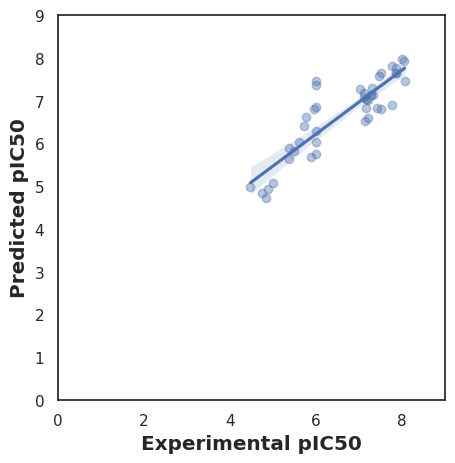

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 9)
ax.set_ylim(0, 9)
ax.figure.set_size_inches(5, 5)
plt.show()

## **5. Data visualization of model performance**

[(0.0, 1.0)]

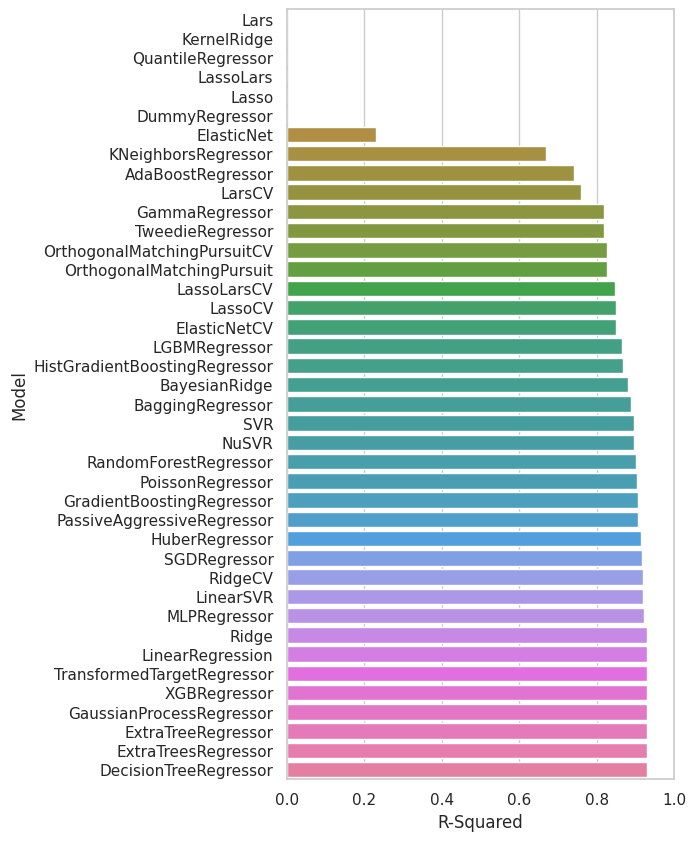

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train, hue=predictions_train.index)
ax.set(xlim=(0, 1))

# Cmap check list

In [ ]:
X_FDA=pd.read_csv('FDA-SMILE from Pubchem.csv')
X_FDA

,Name,SMILES
0,Veliparib (ABT-888),CC1(CCCN1)C2=NC3=C(C=CC=C3N2)C(=O)N
1,Axitinib (AG 013736),CNC(=O)C1=CC=CC=C1SC2=CC3=C(C=C2)C(=NN3)/C=C/C...
2,Saracatinib (AZD0530),CN1CCN(CC1)CCOC2=CC3=C(C(=C2)OC4CCOCC4)C(=NC=N...
3,Roxadustat (FG-4592),CC1=C2C=C(C=CC2=C(C(=N1)C(=O)NCC(=O)O)O)OC3=CC...
4,Selumetinib (AZD6244),CN1C=NC2=C1C=C(C(=C2F)NC3=C(C=C(C=C3)Br)Cl)C(=...
...,...,...
3553,Icatibant Acetate,CC(=O)O.C1CCC2C(C1)CC(N2C(=O)C3CC4=CC=CC=C4CN3...
3554,Plerixafor (AMD3100),C1CNCCNCCCN(CCNC1)CC2=CC=C(C=C2)CN3CCCNCCNCCCNCC3
3555,Sodium Hyaluronate,NaN
3556,Fosinopril Sodium,CCC(=O)OC(C(C)C)OP(=O)(CCCCC1=CC=CC=C1)CC(=O)N...


In [ ]:
df2=X_FDA

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np


In [ ]:
# Calculate fingerprints
fingerprints = []
for smile in list_cmap:
    # Check if 'smile' is a valid SMILES string before processing
    if isinstance(smile, str) and smile != 'nan' and smile != '': #Added a check to make sure smile is a valid string and not an empty string or a string containing 'nan'
        mol = Chem.MolFromSmiles(smile)
        if mol is not None:  #Added a check to make sure mol is not None
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=200)
            fingerprints.append(fp)

# Convert fingerprints to NumPy arrays
fingerprint_arrays = []
for fp in fingerprints:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    fingerprint_arrays.append(arr)

X_cmap = np.asarray(fingerprint_arrays)


[11:00:16] DEPRECATION WARNING: please use MorganGenerator
[11:00:16] DEPRECATION WARNING: please use MorganGenerator
[11:00:16] DEPRECATION WARNING: please use MorganGenerator
[11:00:16] DEPRECATION WARNING: please use MorganGenerator
[11:00:16] DEPRECATION WARNING: please use MorganGenerator
[11:00:16] DEPRECATION WARNING: please use MorganGenerator
[11:00:16] DEPRECATION WARNING: please use MorganGenerator
[11:00:16] DEPRECATION WARNING: please use MorganGenerator
[11:00:16] DEPRECATION WARNING: please use MorganGenerator
[11:00:16] DEPRECATION WARNING: please use MorganGenerator
[11:00:16] DEPRECATION WARNING: please use MorganGenerator
[11:00:16] DEPRECATION WARNING: please use MorganGenerator
[11:00:16] DEPRECATION WARNING: please use MorganGenerator
[11:00:16] DEPRECATION WARNING: please use MorganGenerator
[11:00:16] DEPRECATION WARNING: please use MorganGenerator
[11:00:16] DEPRECATION WARNING: please use MorganGenerator
[11:00:16] DEPRECATION WARNING: please use MorganGenerat

In [ ]:
X_cmap.shape

(3494, 200)

In [ ]:
Y_pred = model.predict(X_cmap)
Y_pred

array([5.81595787, 5.95138094, 5.68164632, ..., 5.79274569, 5.26252038,
       5.3765221 ])

In [ ]:
prediction_FDA = pd.concat([X_FDA, pd.DataFrame(Y_pred, columns=['pre_IC50'])], axis=1)  # Convert Y_pred to a DataFrame and specify column name
prediction_FDA

,Name,SMILES,pre_IC50
0,Veliparib (ABT-888),CC1(CCCN1)C2=NC3=C(C=CC=C3N2)C(=O)N,5.82
1,Axitinib (AG 013736),CNC(=O)C1=CC=CC=C1SC2=CC3=C(C=C2)C(=NN3)/C=C/C...,5.95
2,Saracatinib (AZD0530),CN1CCN(CC1)CCOC2=CC3=C(C(=C2)OC4CCOCC4)C(=NC=N...,5.68
3,Roxadustat (FG-4592),CC1=C2C=C(C=CC2=C(C(=N1)C(=O)NCC(=O)O)O)OC3=CC...,6.69
4,Selumetinib (AZD6244),CN1C=NC2=C1C=C(C(=C2F)NC3=C(C=C(C=C3)Br)Cl)C(=...,7.16
...,...,...,...
3553,Icatibant Acetate,CC(=O)O.C1CCC2C(C1)CC(N2C(=O)C3CC4=CC=CC=C4CN3...,NaN
3554,Plerixafor (AMD3100),C1CNCCNCCCN(CCNC1)CC2=CC=C(C=C2)CN3CCCNCCNCCCNCC3,NaN
3555,Sodium Hyaluronate,NaN,NaN
3556,Fosinopril Sodium,CCC(=O)OC(C(C)C)OP(=O)(CCCCC1=CC=CC=C1)CC(=O)N...,NaN


In [ ]:
prediction_FDA.to_csv('prediction_FDA12.csv', index=False)